# Analyzing Tropical Cyclone Data with Tropycal

The `tropycal` package is a powerful tool designed for the analysis and visualization of tropical cyclone data. It simplifies the process of loading, filtering, and visualizing tropical cyclone tracks and metadata, making it accessible even for those new to working with such datasets.

In this notebook, we will walk through a basic analysis of tropical cyclone data using `tropycal`, similar to the work we did with IBTrACS data. We'll cover how to load data, explore it, and create visualizations, with a focus on simplicity and clarity.

For more detailed tutorials and advanced use cases, you can visit the official `tropycal` documentation and tutorials page: [Tropycal Documentation and Tutorials](https://tropycal.github.io/tropycal/).

Let's get started!


In [2]:

# Import necessary libraries
import tropycal.tracks as tracks
import matplotlib.pyplot as plt




### Why Use the Tropycal Package?

The **Tropycal** package is a Python library designed to make it easier to analyze and visualize tropical cyclone data, including both HURDAT and IBTrACS datasets. It offers a range of functionalities that allow users to:

1. **Access and Analyze Data Easily**: Tropycal abstracts the complexity of working with large datasets like HURDAT and IBTrACS, providing user-friendly functions to access storm data, filter it by various criteria, and perform statistical analyses.

2. **Visualize Storm Tracks and Data**: The package includes built-in tools for plotting storm tracks, intensity over time, and other relevant metrics, helping users to quickly generate insights from the data.

### Introduction to HURDAT and IBTrACS

**HURDAT (Hurricane Database):**
- HURDAT, short for Hurricane Database, is a comprehensive dataset maintained by the National Hurricane Center (NHC). It includes historical records of tropical cyclones in the Atlantic Basin and the Eastern Pacific. The database contains vital information about each storm, including its name, location, maximum sustained winds, central pressure, and classification over time. HURDAT is often used for research related to hurricane trends, historical storm analysis, and risk assessment in the Atlantic region.

**IBTrACS (International Best Track Archive for Climate Stewardship):**
- IBTrACS is a global dataset that combines tropical cyclone data from multiple agencies around the world. Unlike HURDAT, which is focused on the Atlantic Basin and Eastern Pacific, IBTrACS provides a worldwide perspective, offering storm tracks, wind speeds, pressures, and other relevant data for tropical cyclones in all basins. This dataset is crucial for researchers looking to analyze tropical cyclone activity on a global scale, compare storms across different regions, or study the global impacts of these events.

In [3]:
# Load the hurricane data
basin = tracks.TrackDataset(basin='north_atlantic')

# View the data for the latest hurricane season
basin


--> Starting to read in HURDAT2 data
--> Completed reading in HURDAT2 data (2.51 seconds)


<tropycal.tracks.Dataset>
Dataset Summary:
    Basin:             north_atlantic
    Source:            hurdat
    Number of storms:  1973
    Maximum wind:      165 knots (Allen 1980)
    Minimum pressure:  882 hPa (Wilma 2005)
    Year range:        1851 — 2023

In [4]:
# Get a summary of the data for a specific hurricane season (e.g., 2005)
season = basin.get_season(2005)

# View summary of the season
print(season.summary())

# View details of a specific storm, e.g., Hurricane Katrina
katrina = basin.get_storm(('katrina', 2005))
katrina.to_dict()


{'id': ['AL012005', 'AL022005', 'AL032005', 'AL042005', 'AL052005', 'AL062005', 'AL072005', 'AL082005', 'AL092005', 'AL102005', 'AL112005', 'AL122005', 'AL132005', 'AL142005', 'AL152005', 'AL162005', 'AL172005', 'AL182005', 'AL192005', 'AL202005', 'AL212005', 'AL222005', 'AL232005', 'AL242005', 'AL252005', 'AL262005', 'AL272005', 'AL282005', 'AL292005', 'AL302005', 'AL312005'], 'operational_id': ['AL012005', 'AL022005', 'AL032005', 'AL042005', 'AL052005', 'AL062005', 'AL072005', 'AL082005', 'AL092005', 'AL102005', 'AL112005', 'AL122005', 'AL132005', 'AL142005', 'AL152005', 'AL162005', 'AL172005', 'AL182005', 'AL192005', 'AL202005', '', 'AL212005', 'AL222005', 'AL232005', 'AL242005', 'AL252005', 'AL262005', 'AL272005', 'AL282005', 'AL292005', 'AL302005'], 'name': ['ARLENE', 'BRET', 'CINDY', 'DENNIS', 'EMILY', 'FRANKLIN', 'GERT', 'HARVEY', 'IRENE', 'TEN', 'JOSE', 'KATRINA', 'LEE', 'MARIA', 'NATE', 'OPHELIA', 'PHILIPPE', 'RITA', 'NINETEEN', 'STAN', 'UNNAMED', 'TAMMY', 'TWENTY-TWO', 'VINCE

{'id': 'AL122005',
 'operational_id': 'AL122005',
 'name': 'KATRINA',
 'year': 2005,
 'season': 2005,
 'basin': 'north_atlantic',
 'source_info': 'NHC Hurricane Database',
 'source': 'hurdat',
 'time': [datetime.datetime(2005, 8, 23, 18, 0),
  datetime.datetime(2005, 8, 24, 0, 0),
  datetime.datetime(2005, 8, 24, 6, 0),
  datetime.datetime(2005, 8, 24, 12, 0),
  datetime.datetime(2005, 8, 24, 18, 0),
  datetime.datetime(2005, 8, 25, 0, 0),
  datetime.datetime(2005, 8, 25, 6, 0),
  datetime.datetime(2005, 8, 25, 12, 0),
  datetime.datetime(2005, 8, 25, 18, 0),
  datetime.datetime(2005, 8, 25, 22, 30),
  datetime.datetime(2005, 8, 26, 0, 0),
  datetime.datetime(2005, 8, 26, 6, 0),
  datetime.datetime(2005, 8, 26, 12, 0),
  datetime.datetime(2005, 8, 26, 18, 0),
  datetime.datetime(2005, 8, 27, 0, 0),
  datetime.datetime(2005, 8, 27, 6, 0),
  datetime.datetime(2005, 8, 27, 12, 0),
  datetime.datetime(2005, 8, 27, 18, 0),
  datetime.datetime(2005, 8, 28, 0, 0),
  datetime.datetime(2005, 8,

In [5]:
# Filter data to get the track for Hurricane Katrina
katrina_track = katrina.to_dataframe()

# Subset the track data to get specific columns
katrina_track_subset = katrina_track[['lat', 'lon', 'vmax', 'mslp']]
katrina_track_subset.head()


,lat,lon,vmax,mslp
0,23.1,-75.1,30,1008
1,23.4,-75.7,30,1007
2,23.8,-76.2,30,1007
3,24.5,-76.5,35,1006
4,25.4,-76.9,40,1003


<GeoAxes: title={'left': 'Hurricane KATRINA', 'right': '23 Aug 2005 – 30 Aug 2005\n150 kt • 902 hPa • 20.0 ACE'}>

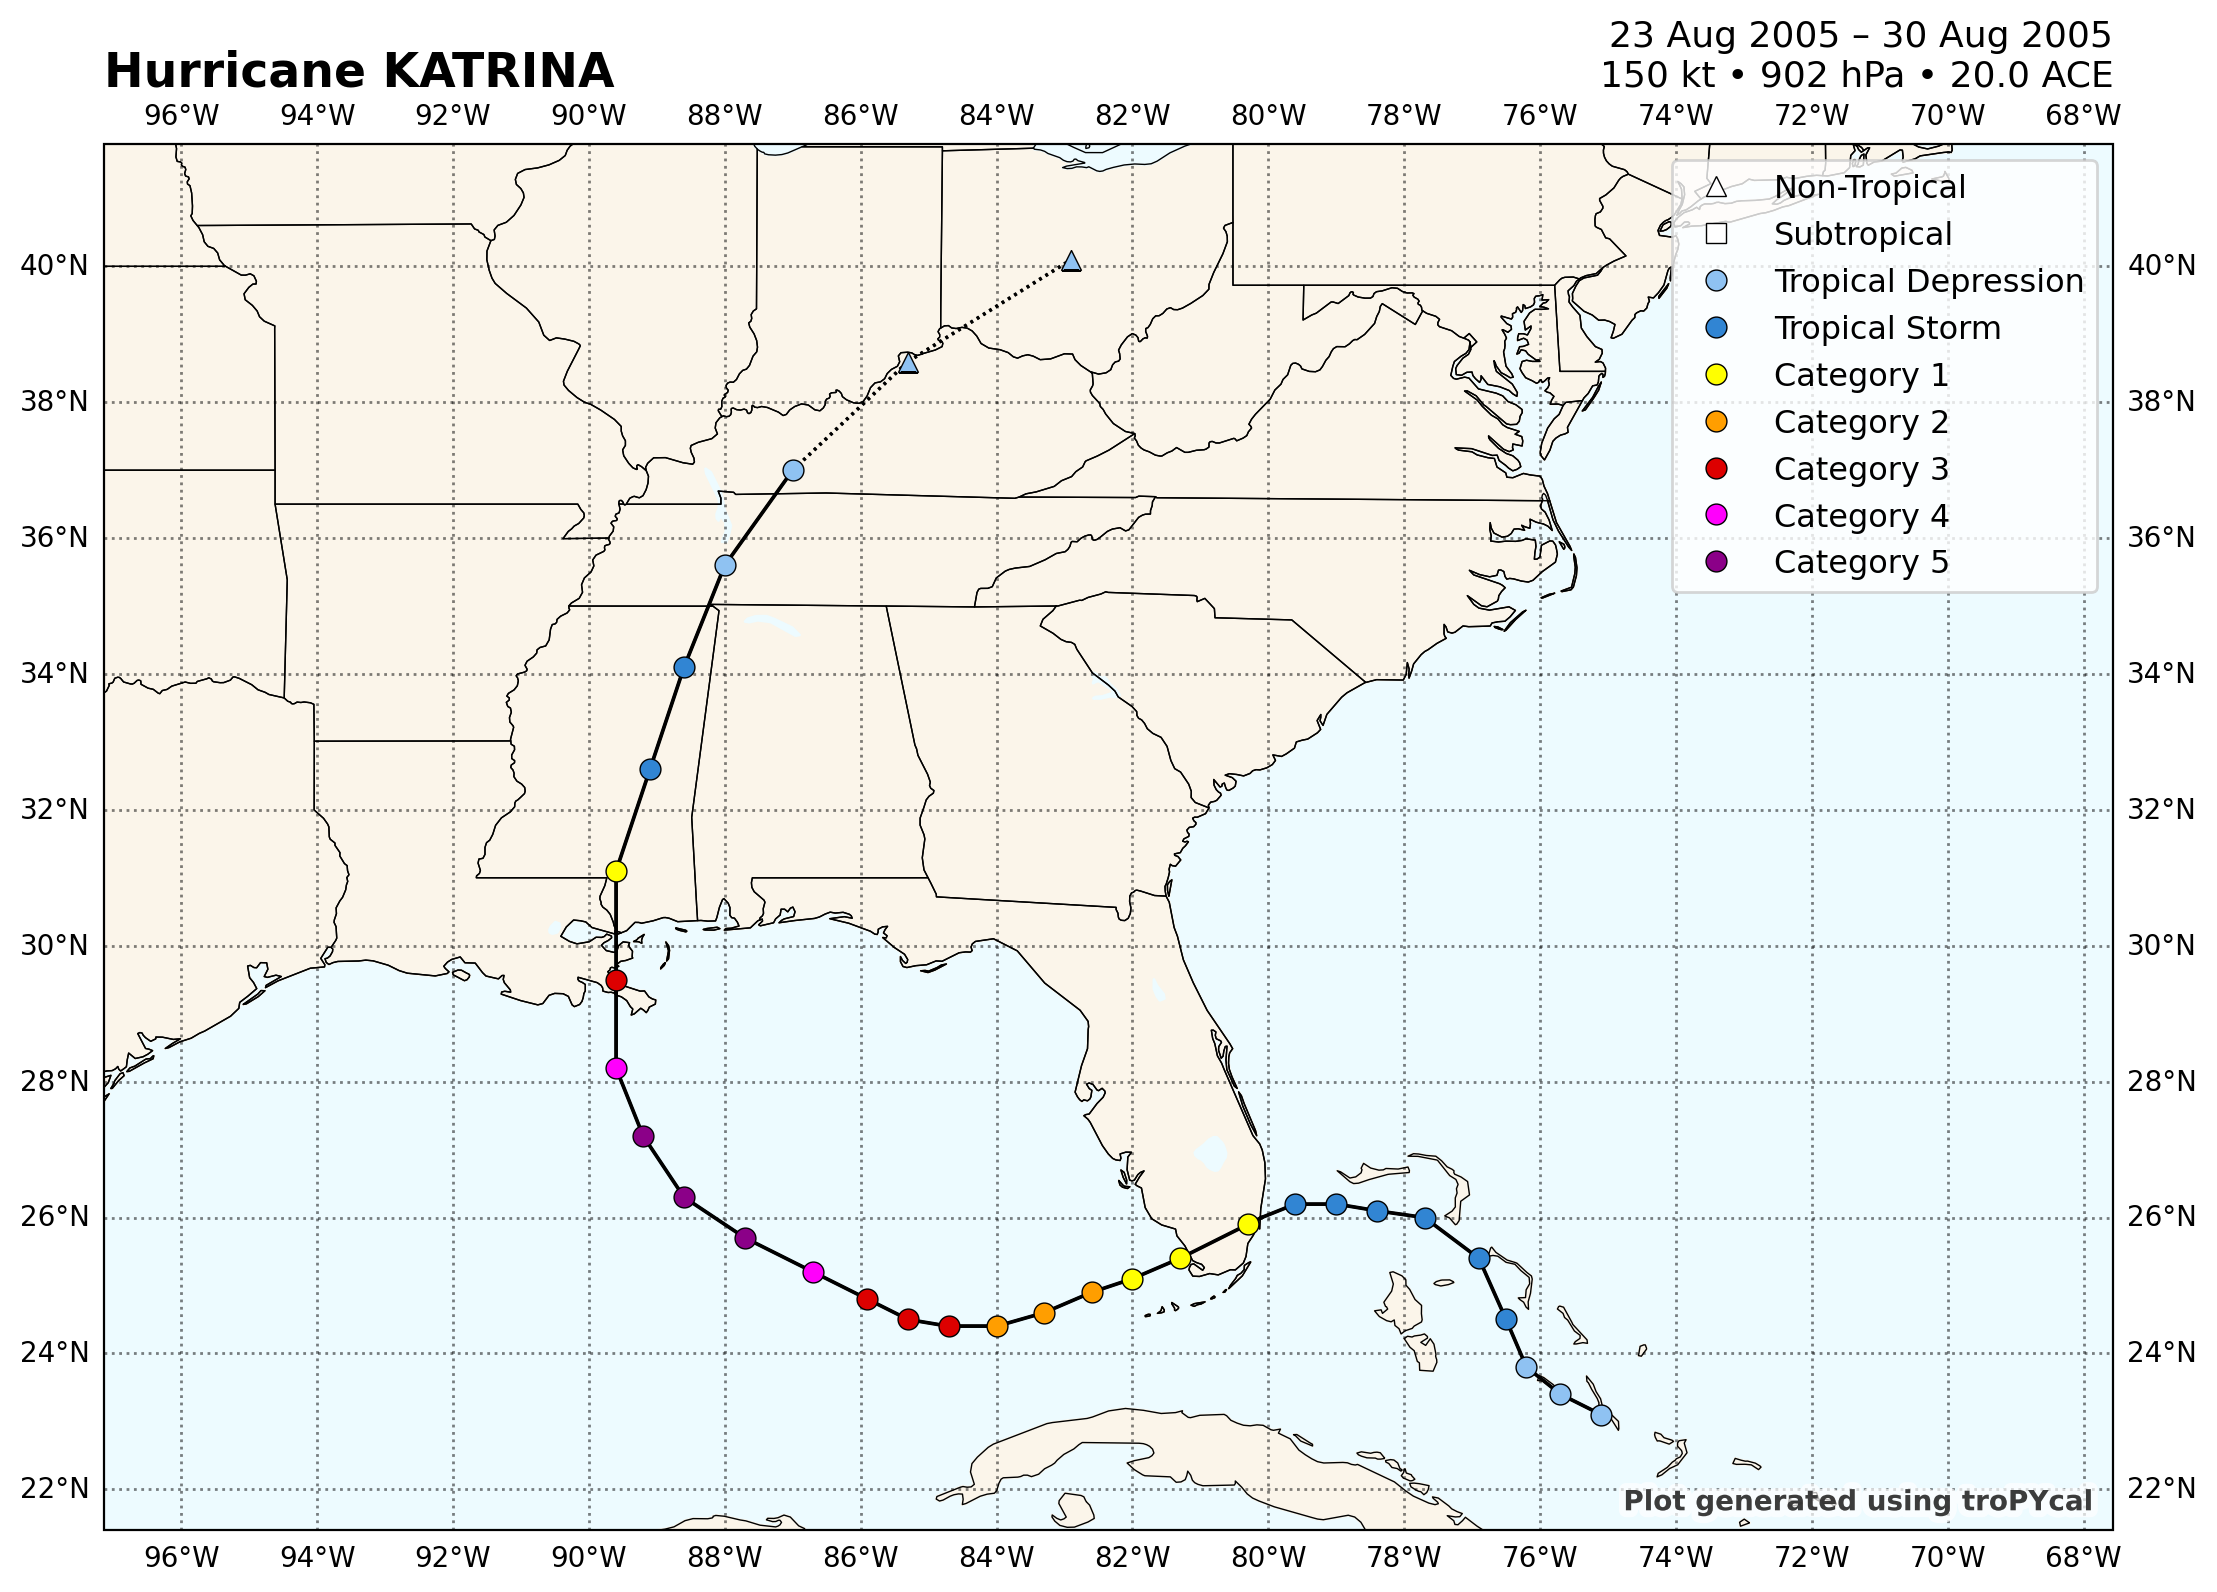

In [6]:
# Plot the track of Hurricane Katrina on a map
katrina.plot()



--> Reading storm data


Possible issue encountered when converting Shape #0 to GeoJSON: Shapefile format requires that polygons contain at least one exterior ring, but the Shape was entirely made up of interior holes (defined by counter-clockwise orientation in the shapefile format). The rings were still included but were encoded as GeoJSON exterior rings instead of holes.
Possible issue encountered when converting Shape #0 to GeoJSON: Shapefile format requires that polygons contain at least one exterior ring, but the Shape was entirely made up of interior holes (defined by counter-clockwise orientation in the shapefile format). The rings were still included but were encoded as GeoJSON exterior rings instead of holes.
Possible issue encountered when converting Shape #2 to GeoJSON: Shapefile format requires that polygons contain at least one exterior ring, but the Shape was entirely made up of interior holes (defined by counter-clockwise orientation in the shapefile format). The rings were still included but w

--> Generating plot


<GeoAxes: title={'left': 'Summary & NHC 7-Day Formation Outlook', 'right': 'Valid: 00 UTC 12 Sep 2023'}>

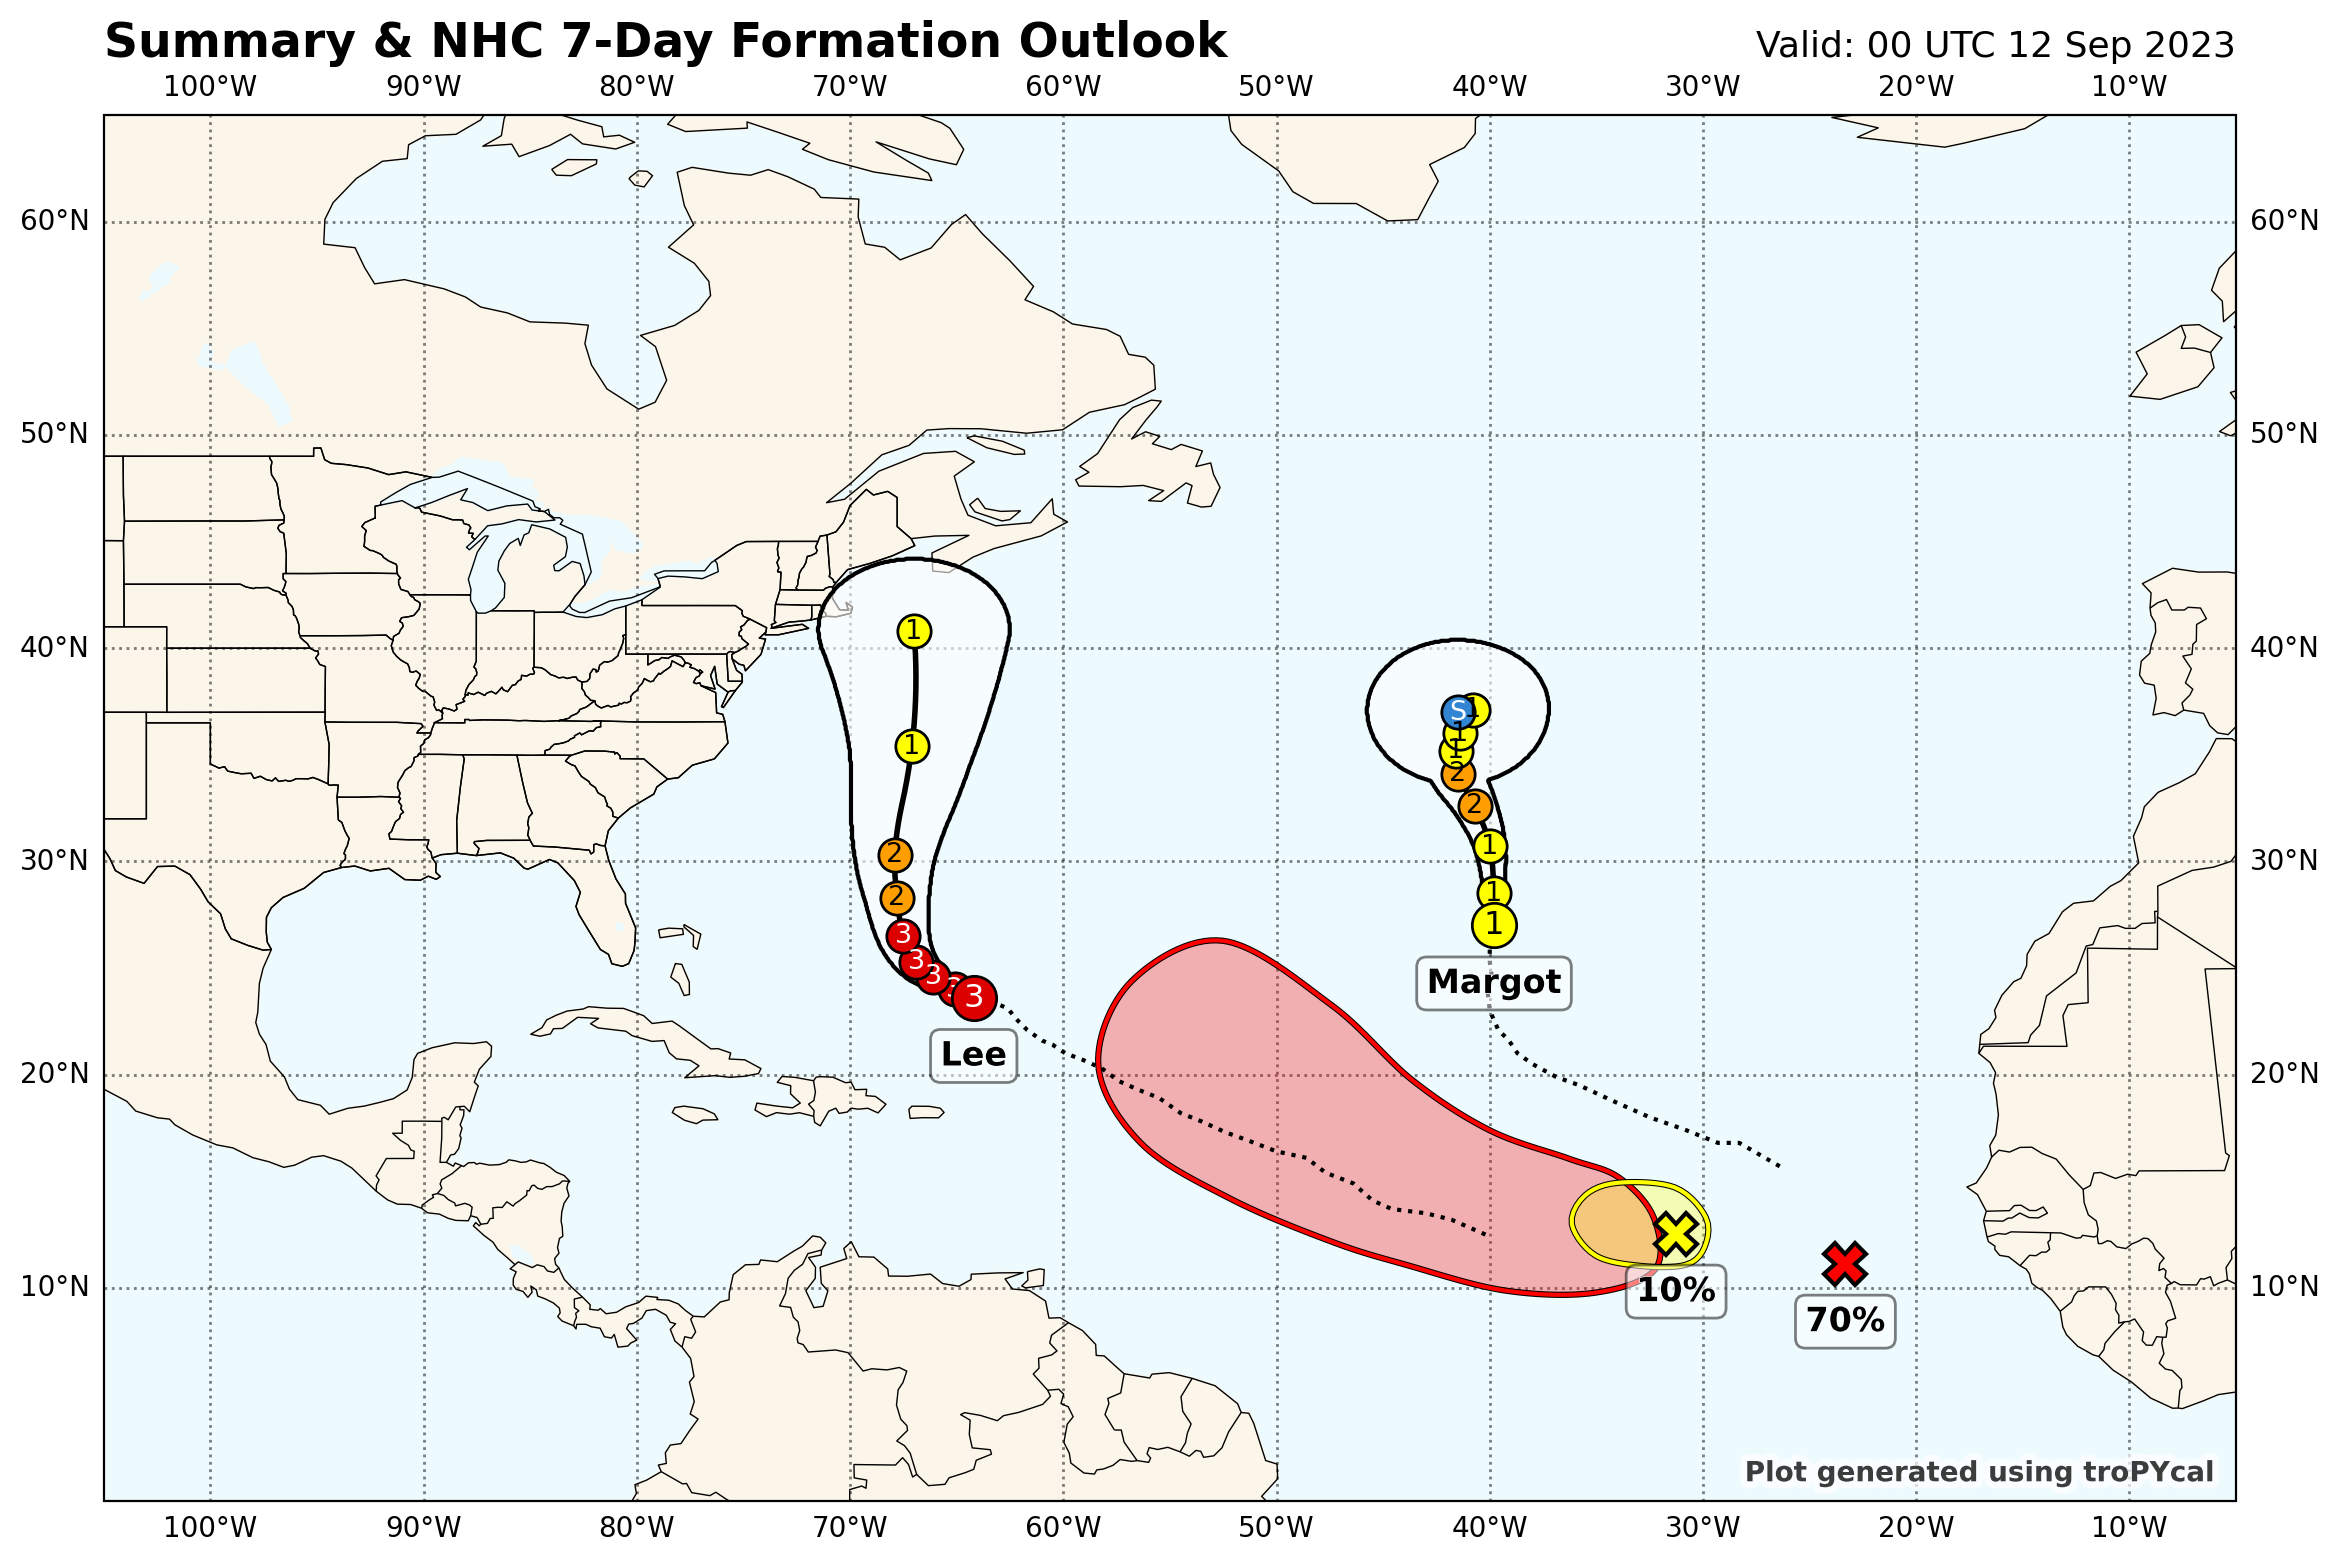

In [7]:
import datetime as dt
basin.plot_summary(dt.datetime(2023,9,12,0),domain='north_atlantic')

### Wrapping Up

In this tutorial, we've explored the basics of using the Tropycal package to work with tropical cyclone data. Starting with an introduction to the HURDAT and IBTrACS datasets. 

By leveraging Tropycal's built-in functions, you can quickly move from raw data to insightful visualizations and analyses. However, this tutorial only scratches the surface of what Tropycal can do. The package is highly flexible and extendable, making it suitable for a wide range of research questions and projects.

For more advanced tutorials, in-depth examples, and additional resources, be sure to visit the [official Tropycal documentation website](https://tropycal.github.io/tropycal/). There, you'll find a wealth of information that can help you get the most out of this powerful tool, whether you're a beginner or an experienced researcher in the field of tropical cyclone studies.

Happy exploring!
